## Ch 3 인공신경망 (Artificial Neural Network)


## 인공신경망 - Multilayer Perceptron
### 퍼셉트론 및 다층 신경망 (≅ 인공신경망) 구조  
-  단 하나의 직선을 그어 파란색 원과 붉은색 사각형을 분류할 수 있는가?  

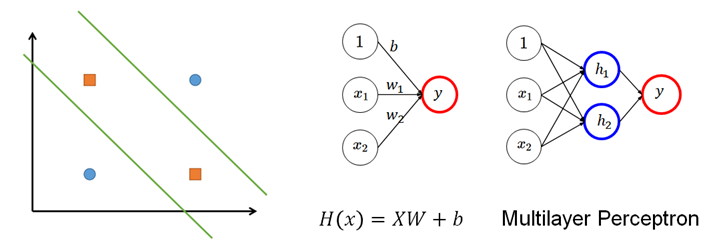


## XOR logic gate 학습 : 로지스틱 회귀분석 vs. MLP
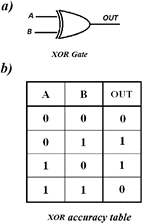;
### 1. 로지스틱 회귀분석

Recall, 로지스틱 회귀분석   
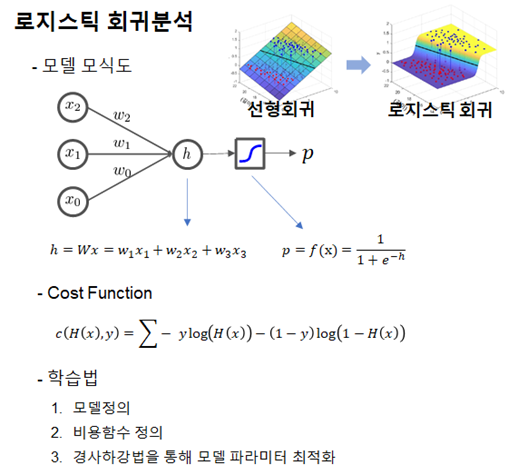

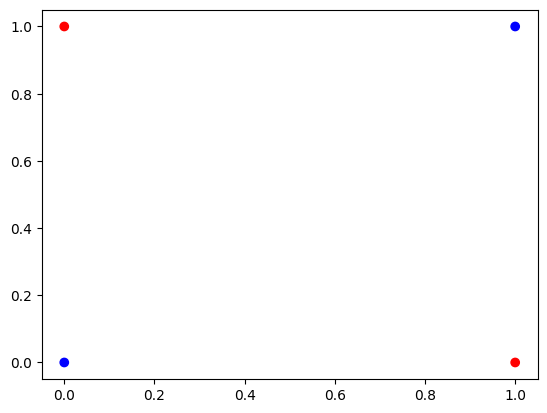

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 랜덤 시드 설정
tf.random.set_seed(0)

# 데이터 생성
xdata = tf.constant([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=tf.float32)
ydata = tf.constant([[0], [1], [1], [0]], dtype=tf.float32)

# 데이터 시각화
plt.scatter(xdata[:, 0], xdata[:, 1], color=['blue', 'red', 'red', 'blue'])
plt.show()

# 데이터셋 정의
dataset = tf.data.Dataset.from_tensor_slices((xdata, ydata)).batch(len(xdata))

# 손실 함수 정의
def loss_fn(y_true, y_pred):
    cost = -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
    return cost

# 정확도 함수 정의
def accuracy_fn(y_true, y_pred):
    predicted = tf.cast(y_pred > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y_true), dtype=tf.float32))
    return accuracy
  
# 모델 정의
def model(x):
    hypothesis = tf.divide(1.0, 1.0 + tf.exp(-tf.matmul(x, W) - b))  # 로지스틱 회귀
    return hypothesis



#### 모델 학습

In [5]:
# 훈련 매개변수 및 변수 초기화
EPOCHS = 2000
W = tf.Variable(tf.random.normal([2, 1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

# 훈련 루프
for step in range(EPOCHS):
    for x, labels in dataset:
        with tf.GradientTape() as tape:
            pred = model(x)
            loss = loss_fn(labels, pred)
        grads = tape.gradient(loss, [W, b])
        optimizer.apply_gradients(zip(grads, [W, b]))
    
    if (step + 1) % 100 == 0:
        print("Iter: {:5}, Loss: {:5.4f}".format(step + 1, loss))
acc = accuracy_fn(ydata, model(xdata))
print("Accuracy: {:.4f}".format(acc))


Iter:   100, Loss: 0.8642
Iter:   200, Loss: 0.7466
Iter:   300, Loss: 0.7137
Iter:   400, Loss: 0.7045
Iter:   500, Loss: 0.7011
Iter:   600, Loss: 0.6993
Iter:   700, Loss: 0.6980
Iter:   800, Loss: 0.6970
Iter:   900, Loss: 0.6962
Iter:  1000, Loss: 0.6956
Iter:  1100, Loss: 0.6951
Iter:  1200, Loss: 0.6947
Iter:  1300, Loss: 0.6944
Iter:  1400, Loss: 0.6942
Iter:  1500, Loss: 0.6940
Iter:  1600, Loss: 0.6938
Iter:  1700, Loss: 0.6937
Iter:  1800, Loss: 0.6936
Iter:  1900, Loss: 0.6935
Iter:  2000, Loss: 0.6934
Accuracy: 0.5000


#### 결과 가시화

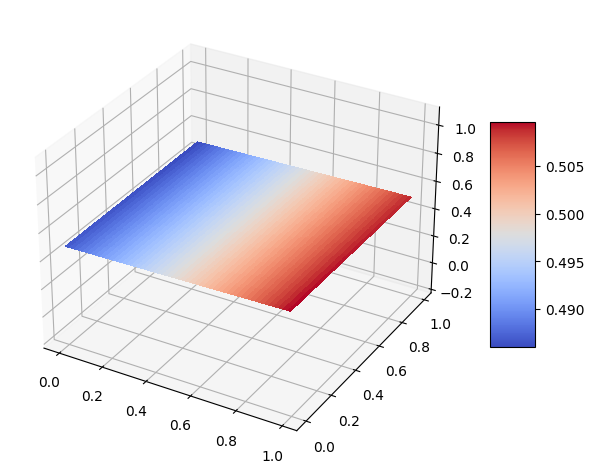

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 생성
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
X1, X2 = np.meshgrid(x1, x2)

# 모델 적용
h = model(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))).astype(np.float32))
H = h.numpy().reshape(100, 100)

# 표면 그래프 그리기
surf = ax.plot_surface(X1, X2, H, cmap='coolwarm', linewidth=0, antialiased=False)
ax.set_zlim(-0.2, 1.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

#### 인공신경망 - Multilayer perceptron (MLP) 학습
##### 다층 신경망 (단순 선형)
 - Hidden Layer가 있어도 단순 선형 접합이면 최종 계산식에는 Hidden Layer가 없는 것과 동일함  
   
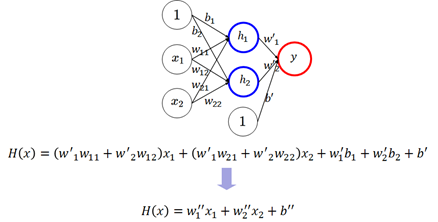


##### 다층 신경망 (비선형 Activation 함수)
 - 비선형 Activation 함수에 의해 Hidden layer의 역할이 보존됨  
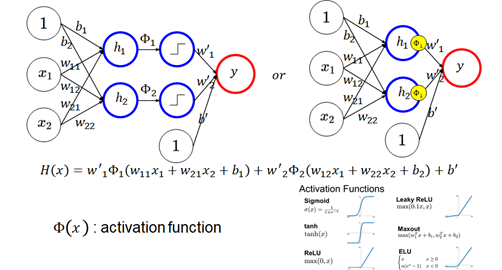

#### 다층 신경망 (MLP)를 이용한 이진 분류
- XOR logtic gate 학습  
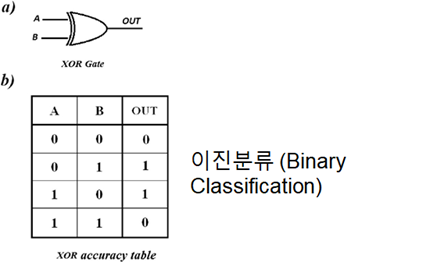
  
- 마지막 Layer에 Sigmoid Activation Function 을 추가로 두어 최종 값의 범위를 0 ~ 1 변환  

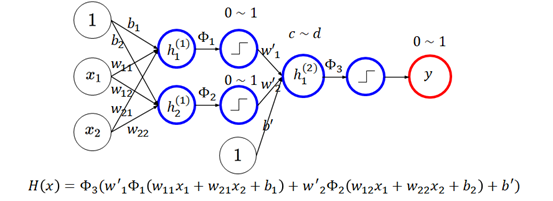

In [24]:
# 가중치와 편향 초기화
W1 = tf.Variable(tf.random.normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random.normal([2]), name='bias1')
W2 = tf.Variable(tf.random.normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random.normal([1]), name='bias2')

# 훈련 가능한 변수 목록
trainable_vars = [W1, b1, W2, b2]

# 모델 정의
def model(x):
    l1 = tf.sigmoid(tf.matmul(x, W1) + b1)
    hypothesis = tf.sigmoid(tf.matmul(l1, W2) + b2) 
    return hypothesis

# Binary Classification 문제 이기 때문에 Logistic Regression에서 사용했던 Loss, Accuracy 함수 그대로 사용

# 훈련 설정
EPOCHS = 3000
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)

# 훈련 루프
for step in range(EPOCHS):
    for x, labels in dataset:
        with tf.GradientTape() as tape:
            pred = model(x)
            loss = loss_fn(labels, pred)
        grads = tape.gradient(loss, trainable_vars)
        optimizer.apply_gradients(zip(grads, trainable_vars))
    
    if (step + 1) % 100 == 0:
        print("Iter: {:5}, Loss: {:5.4f}".format(step + 1, loss))
        

acc = accuracy_fn(ydata, model(xdata))

print("Accuracy: {:.4f}".format(acc))


Iter:   100, Loss: 0.6890
Iter:   200, Loss: 0.6762
Iter:   300, Loss: 0.6413
Iter:   400, Loss: 0.5892
Iter:   500, Loss: 0.5502
Iter:   600, Loss: 0.5273
Iter:   700, Loss: 0.5106
Iter:   800, Loss: 0.4602
Iter:   900, Loss: 0.2892
Iter:  1000, Loss: 0.1524
Iter:  1100, Loss: 0.0936
Iter:  1200, Loss: 0.0658
Iter:  1300, Loss: 0.0503
Iter:  1400, Loss: 0.0405
Iter:  1500, Loss: 0.0338
Iter:  1600, Loss: 0.0289
Iter:  1700, Loss: 0.0253
Iter:  1800, Loss: 0.0224
Iter:  1900, Loss: 0.0201
Iter:  2000, Loss: 0.0183
Iter:  2100, Loss: 0.0167
Iter:  2200, Loss: 0.0154
Iter:  2300, Loss: 0.0143
Iter:  2400, Loss: 0.0133
Iter:  2500, Loss: 0.0124
Iter:  2600, Loss: 0.0117
Iter:  2700, Loss: 0.0110
Iter:  2800, Loss: 0.0104
Iter:  2900, Loss: 0.0099
Iter:  3000, Loss: 0.0094
Accuracy: 1.0000


#### 결과 가시화

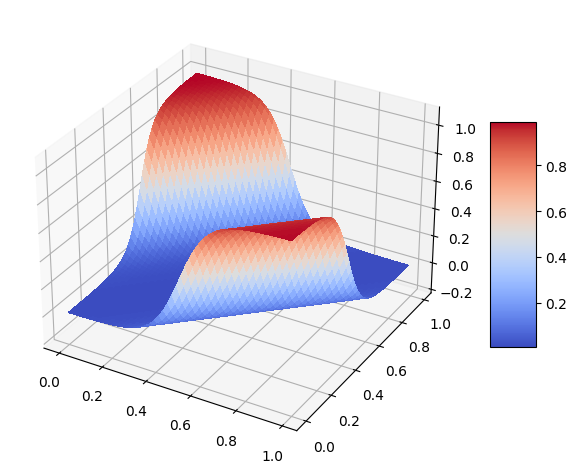

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 생성
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
X1, X2 = np.meshgrid(x1, x2)

# 모델 적용
h = model(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))).astype(np.float32))
H = h.numpy().reshape(100, 100)

# 표면 그래프 그리기
surf = ax.plot_surface(X1, X2, H, cmap='coolwarm', linewidth=0, antialiased=False)
ax.set_zlim(-0.2, 1.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()


#### Tensorflow model을 활용한 간단한 MLP 모델 구현


In [30]:
# # 이전 세션 클리어
tf.keras.backend.clear_session()

# model정의의 input_shape = (2,) --> 뒤의 실제 model의 input_data 차원과 비교.
model = tf.keras.models.Sequential([   
     tf.keras.layers.Dense(units=2,activation='sigmoid',
                              input_shape=(xdata.shape[1],)),
     tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.summary()
# 훈련 설정
EPOCHS = 3000
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)

# 훈련 루프
for step in range(EPOCHS):
    for x, labels in dataset:
        with tf.GradientTape() as tape:
            #실제 model의 input data의 차원 (4, 2) = (batch size, input_shape)
            #Tensorflow의 model은 기본적으로 batch가 있을 것을 가정하고 구현됨.
            pred = model(x)
            loss = loss_fn(labels, pred)
            
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    if (step + 1) % 100 == 0:
        print("Iter: {:5}, Loss: {:5.4f}".format(step + 1, loss))     

acc = accuracy_fn(ydata, model(xdata))

print("Accuracy: {:.4f}".format(acc))


Iter:   100, Loss: 0.6678
Iter:   200, Loss: 0.6240
Iter:   300, Loss: 0.5565
Iter:   400, Loss: 0.4773
Iter:   500, Loss: 0.3438
Iter:   600, Loss: 0.1976
Iter:   700, Loss: 0.1186
Iter:   800, Loss: 0.0804
Iter:   900, Loss: 0.0596
Iter:  1000, Loss: 0.0469
Iter:  1100, Loss: 0.0385
Iter:  1200, Loss: 0.0326
Iter:  1300, Loss: 0.0281
Iter:  1400, Loss: 0.0247
Iter:  1500, Loss: 0.0221
Iter:  1600, Loss: 0.0199
Iter:  1700, Loss: 0.0181
Iter:  1800, Loss: 0.0166
Iter:  1900, Loss: 0.0153
Iter:  2000, Loss: 0.0142
Iter:  2100, Loss: 0.0132
Iter:  2200, Loss: 0.0124
Iter:  2300, Loss: 0.0117
Iter:  2400, Loss: 0.0110
Iter:  2500, Loss: 0.0104
Iter:  2600, Loss: 0.0099
Iter:  2700, Loss: 0.0094
Iter:  2800, Loss: 0.0090
Iter:  2900, Loss: 0.0086
Iter:  3000, Loss: 0.0082
Accuracy: 1.0000


(100, 100) (100, 100)
(10000, 2)


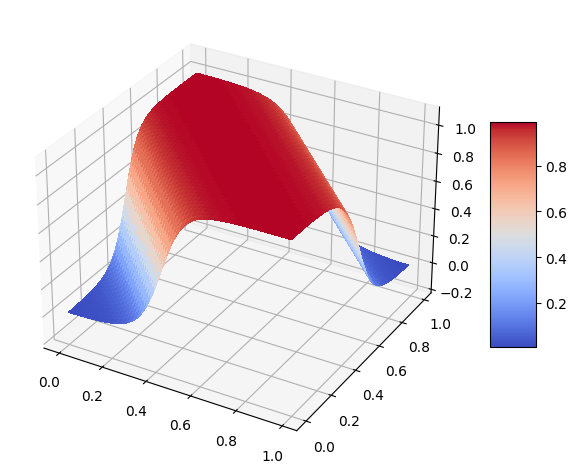

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 생성
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
X1, X2 = np.meshgrid(x1, x2)
#print(X1.shape, X2.shape)

# 모델 적용
#print(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))).shape)
h = model(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))).astype(np.float32))
H = h.numpy().reshape(100, 100)

# 표면 그래프 그리기
surf = ax.plot_surface(X1, X2, H, cmap='coolwarm', linewidth=0, antialiased=False)
ax.set_zlim(-0.2, 1.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()


### Tensorflow model 설정
Tensorflow를 이용한 3가지 MLP 모델 정의 방법

1. 세부적인 내용 까지 모두 구현

In [7]:
# 가중치와 편향 초기화
W1 = tf.Variable(tf.random.normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random.normal([2]), name='bias1')
W2 = tf.Variable(tf.random.normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random.normal([1]), name='bias2')

# 훈련 가능한 변수 목록
trainable_vars = [W1, b1, W2, b2]

# 모델 정의
def model(x):
    l1 = tf.sigmoid(tf.matmul(x, W1) + b1)
    hypothesis = tf.sigmoid(tf.matmul(l1, W2) + b2)  # 수정: l1을 사용
    retu

# 손실 함수 정의
def loss_fn(y_true, y_pred):
    cost = -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
    return cost

# 정확도 함수 정의
def accuracy_fn(y_true, y_pred):
    predicted = tf.cast(y_pred > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y_true), dtype=tf.float32))
    return accuracy


2. Tensorflow 함수를 이용해서 간단하게 정의

In [8]:
# 모델 정의
model = tf.keras.models.Sequential([   
     tf.keras.layers.Dense(units=2,activation='sigmoid',
                              input_shape=(xdata.shape[1],)),
     tf.keras.layers.Dense(units=1, activation='sigmoid')
])

#손실 함수 정의
loss_fn = tf.keras.losses.BinaryCrossentropy()

# 정확도 함수 정의
accuracy_fn = tf.keras.metrics.BinaryAccuracy()


In [9]:
# 모델 학습

# 훈련 설정
EPOCHS = 2000
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)

# 훈련 루프
for step in range(EPOCHS):
    for x, labels in dataset:
        with tf.GradientTape() as tape:
            pred = model(x)
            loss = loss_fn(labels, pred)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    if (step + 1) % 100 == 0:
        print("Iter: {:5}, Loss: {:5.4f}".format(step + 1, loss))
        

acc = accuracy_fn(ydata, model(xdata))

print("Accuracy: {:.4f}".format(acc))


Iter:   100, Loss: 0.6903
Iter:   200, Loss: 0.6802
Iter:   300, Loss: 0.6487
Iter:   400, Loss: 0.5914
Iter:   500, Loss: 0.5361
Iter:   600, Loss: 0.4896
Iter:   700, Loss: 0.4245
Iter:   800, Loss: 0.2801
Iter:   900, Loss: 0.1612
Iter:  1000, Loss: 0.1018
Iter:  1100, Loss: 0.0717
Iter:  1200, Loss: 0.0546
Iter:  1300, Loss: 0.0437
Iter:  1400, Loss: 0.0363
Iter:  1500, Loss: 0.0310
Iter:  1600, Loss: 0.0269
Iter:  1700, Loss: 0.0238
Iter:  1800, Loss: 0.0213
Iter:  1900, Loss: 0.0193
Iter:  2000, Loss: 0.0176
Accuracy: 1.0000


3. Tensorflow 함수를 이용해서 학습과정까지 단순화

In [15]:
# 모델 정의
model = tf.keras.models.Sequential([   
     tf.keras.layers.Dense(units=2,activation='sigmoid',
                              input_shape=(xdata.shape[1],)),
     tf.keras.layers.Dense(units=1, activation='sigmoid')
])

sgd_optimizer = tf.keras.optimizers.SGD(0.5)

model.compile(optimizer=sgd_optimizer,loss='binary_crossentropy', metrics= 'binary_accuracy')

model.fit(xdata, ydata, epochs=2000)

acc = tf.keras.metrics.BinaryAccuracy()        
acc.update_state(ydata, model(xdata))
print("Accuracy: {:.4f}".format(acc.result().numpy()))


Epoch 1/2000
1/1 [==============================] - 0s 153ms/step - loss: 0.7325 - binary_accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.7182 - binary_accuracy: 0.5000
Epoch 3/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.7091 - binary_accuracy: 0.5000
Epoch 4/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.7033 - binary_accuracy: 0.5000
Epoch 5/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6996 - binary_accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6973 - binary_accuracy: 0.5000
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6958 - binary_accuracy: 0.5000
Epoch 8/2000
1/1 [==============================] - 0s 1000us/step - loss: 0.6949 - binary_accuracy: 0.5000
Epoch 9/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6943 - binary_accuracy: 0.5000
Epoch 10/2000
1/1 [==============================]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 2ms/step - loss: 0.6257 - binary_accuracy: 0.7500
Epoch 1577/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6252 - binary_accuracy: 0.7500
Epoch 1578/2000
1/1 [==============================] - 0s 1000us/step - loss: 0.6248 - binary_accuracy: 0.7500
Epoch 1579/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6243 - binary_accuracy: 0.7500
Epoch 1580/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6238 - binary_accuracy: 0.7500
Epoch 1581/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6234 - binary_accuracy: 0.7500
Epoch 1582/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6229 - binary_accuracy: 0.7500
Epoch 1583/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6225 - binary_accuracy: 0.7500
Epoch 1584/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6220 - binary_accuracy: 0.7500
Epoch 1585/2000
1/1 [====================

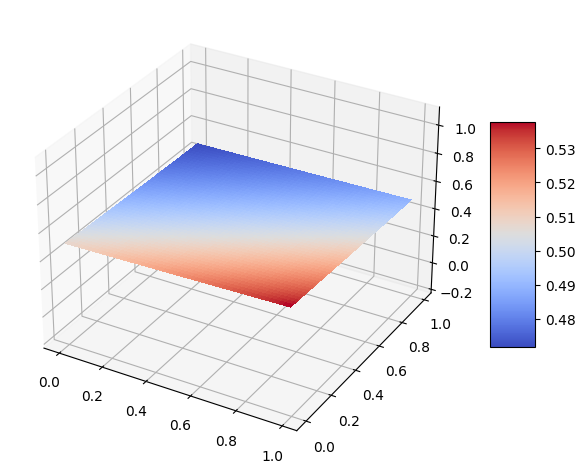

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 생성
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
X1, X2 = np.meshgrid(x1, x2)
#print(X1.shape, X2.shape)

# 모델 적용
#print(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))).shape)
h = model(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))).astype(np.float32))
H = h.numpy().reshape(100, 100)

# 표면 그래프 그리기
surf = ax.plot_surface(X1, X2, H, cmap='coolwarm', linewidth=0, antialiased=False)
ax.set_zlim(-0.2, 1.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()


#### Tensorflow Model 설정
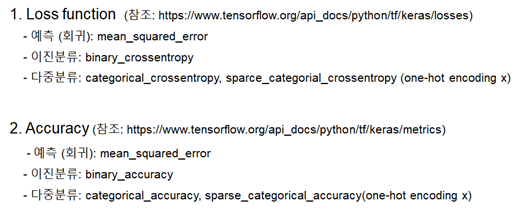

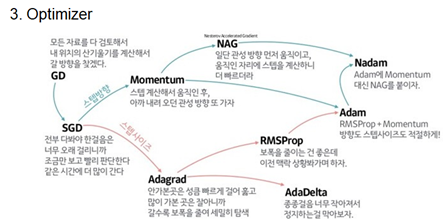

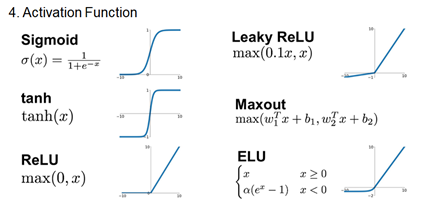

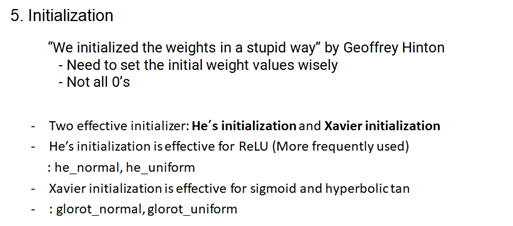

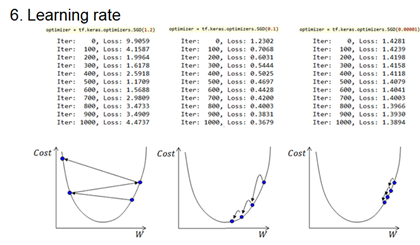

### 실습. Stress-Strain Curve Fitting
Hot compression test의 Stress-Strain 데이터를 ANN으로 Fitting 해보시오  
파일이름: "stress_strain_data.csv"

In [ ]:
train_data = np.loadtxt('stress_strain_data.csv',delimiter=',')

